In [1]:
import numpy as np
import scipy as sp
from scipy.stats import unitary_group
from qiskit import Aer, execute, QuantumCircuit
from qiskit.quantum_info.operators import Operator

backend = Aer.get_backend("qasm_simulator")
from qiskit.visualization import plot_histogram

from utils_decompose import multiplexor, demultiplexor, unitary_diag
from utils_decompose import cos_sin_decomposition, zyz_decomposition, ucry_decomposition, ucrz_decomposition, two_qubit_decomposition, global_phase_gate
from utils import universal_ud

Successfully decomposed: True


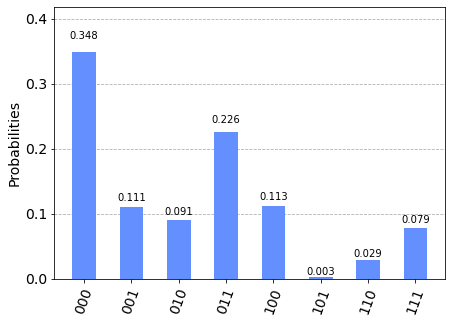

In [2]:
N = 3

Display = False

r = np.random.RandomState(77)
M = unitary_group.rvs(2**N,random_state=r)

U, CS, V = cos_sin_decomposition(M,N)

U1,D1,V1 = demultiplexor(U,N)
U2,D2,V2 = demultiplexor(V,N)

rcst_U = multiplexor(U1,D1,V1,N)
uni_D1 = unitary_diag(D1,N)

rcst_V = multiplexor(U2,D2,V2,N)
uni_D2 = unitary_diag(D2,N)

if Display == True:
    print("Original matrix:\n",np.round(M,3))
    print("Reconstruct matrix:\n", np.round(rcst_U@CS@rcst_V,3))
    
print("Successfully decomposed:",np.allclose(M,rcst_U@CS@rcst_V))

qc = QuantumCircuit(N)

qc.unitary(Operator(M),range(N))
qc.measure_all()

result = execute(qc, backend=backend,shots=4096).result()
plot_histogram(result.get_counts())

Global phase: -3.2654177558586843
CNOT counts: 23


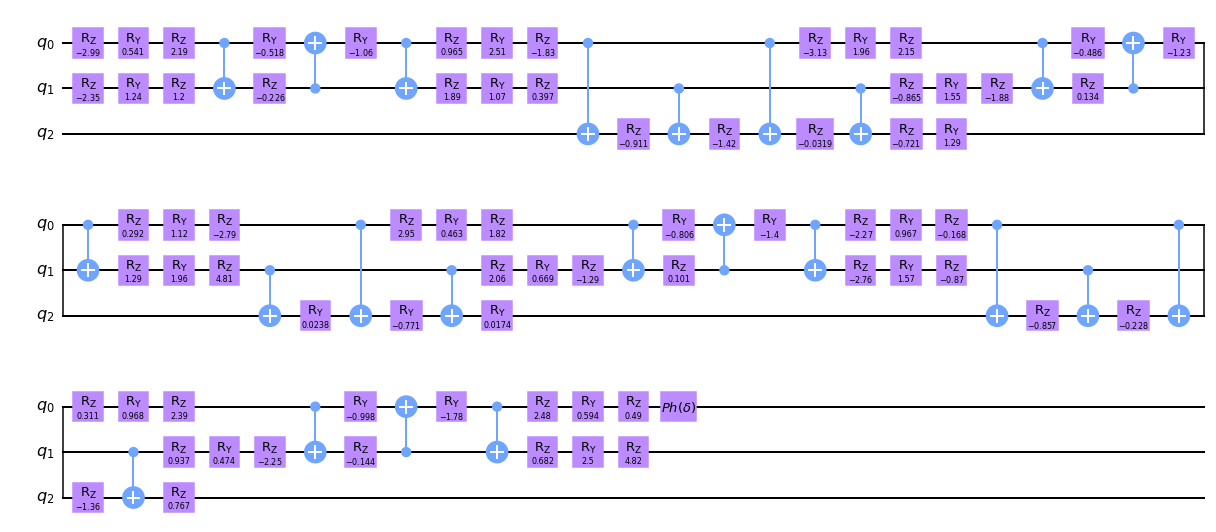

In [3]:
qc = QuantumCircuit(N)
phase = 0

phase = universal_ud(qc,M,range(N),phase)
global_phase_gate(qc,phase,0)

print("Global phase:",phase)
print("CNOT counts:", qc.count_ops()['cx'])
qc.draw(output="mpl")

Successfully encoded: True


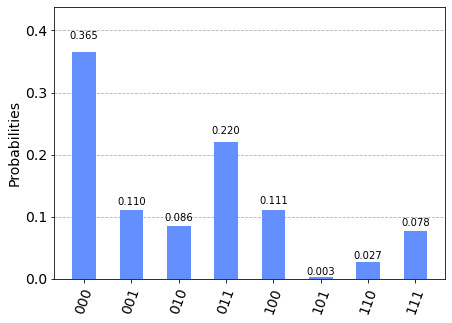

In [4]:
print("Successfully encoded:",np.allclose(M,np.matrix(Operator(qc))))
qc.measure_all()

result = execute(qc, backend=backend,shots=4096).result()
plot_histogram(result.get_counts())

#### Qiskit's built-in unitary decomposition

https://journals.aps.org/pra/abstract/10.1103/PhysRevA.93.032318

This method achieves the theoretical lower bound on the number of used CNOT gates.

CNOT counts: 23


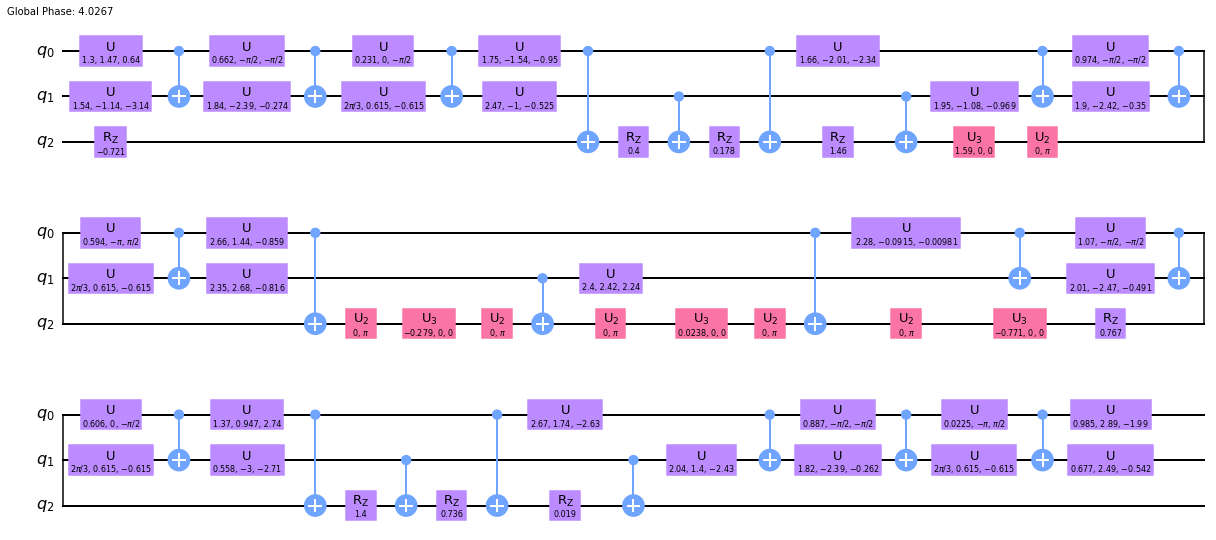

In [5]:
qc = QuantumCircuit(N)
qc.unitary(Operator(M),range(N))
print("CNOT counts:", qc.decompose().decompose().decompose().decompose().count_ops()['cx'])
qc.decompose().decompose().decompose().decompose().draw(output="mpl")